In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('owid_covid_data_us_subset_modified.csv')
df

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,icu_patients,hosp_patients,weekly_hosp_admissions,...,daily_death_change_rate,hospitalization_rate,icu_rate,case_fatality_rate,7day_avg_new_cases,7day_avg_new_deaths,hospitalization_need,icu_requirement,hospitalization_need_num,icu_requirement_num
0,2020-07-21,3853351.0,60012.0,145801.0,932.0,11390.679,430.994,11458.0,42195.0,30552.0,...,NaN,1.095021,0.297352,3.783746,NaN,NaN,High,High,2,2
1,2020-07-22,3911870.0,58519.0,146668.0,867.0,11563.663,433.557,12487.0,46107.0,31352.0,...,0.594646,1.178643,0.319208,3.749307,NaN,NaN,High,High,2,2
2,2020-07-23,3975206.0,63336.0,147861.0,1193.0,11750.887,437.084,13916.0,47834.0,31679.0,...,0.813402,1.203309,0.350070,3.719581,NaN,NaN,High,High,2,2
3,2020-07-24,4047622.0,72416.0,149052.0,1191.0,11964.952,440.604,13627.0,46748.0,31870.0,...,0.805486,1.154950,0.336667,3.682458,NaN,NaN,High,High,2,2
4,2020-07-25,4120764.0,73142.0,150306.0,1254.0,12181.163,444.311,14402.0,51831.0,32804.0,...,0.841317,1.257801,0.349498,3.647527,NaN,NaN,High,High,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2023-05-16,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1052.0,7949.0,8872.0,...,0.000000,0.007685,0.001017,1.089701,13322.857143,277.571429,Low,Low,0,0
1030,2023-05-17,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1079.0,7785.0,8768.0,...,0.000000,0.007526,0.001043,1.089701,13322.857143,277.571429,Low,Low,0,0
1031,2023-05-18,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1030.0,7576.0,8617.0,...,0.000000,0.007324,0.000996,1.089701,13322.857143,277.571429,Low,Low,0,0
1032,2023-05-19,103436829.0,0.0,1127152.0,0.0,305763.910,3331.912,1015.0,7613.0,8633.0,...,0.000000,0.007360,0.000981,1.089701,13322.857143,277.571429,Low,Low,0,0


In [3]:
df.isnull().sum()

date                         0
total_cases                  0
new_cases                    0
total_deaths                 0
new_deaths                   1
total_cases_per_million      0
total_deaths_per_million     0
icu_patients                 0
hosp_patients                0
weekly_hosp_admissions       0
daily_case_change_rate       1
daily_death_change_rate      2
hospitalization_rate         0
icu_rate                     0
case_fatality_rate           0
7day_avg_new_cases           6
7day_avg_new_deaths         13
hospitalization_need         0
icu_requirement              0
hospitalization_need_num     0
icu_requirement_num          0
dtype: int64

In [4]:
# Drop columns with any empty values
df.dropna(axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1034 non-null   object 
 1   total_cases               1034 non-null   float64
 2   new_cases                 1034 non-null   float64
 3   total_deaths              1034 non-null   float64
 4   total_cases_per_million   1034 non-null   float64
 5   total_deaths_per_million  1034 non-null   float64
 6   icu_patients              1034 non-null   float64
 7   hosp_patients             1034 non-null   float64
 8   weekly_hosp_admissions    1034 non-null   float64
 9   hospitalization_rate      1034 non-null   float64
 10  icu_rate                  1034 non-null   float64
 11  case_fatality_rate        1034 non-null   float64
 12  hospitalization_need      1034 non-null   object 
 13  icu_requirement           1034 non-null   object 
 14  hospital

In [6]:
df

,date,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,icu_patients,hosp_patients,weekly_hosp_admissions,hospitalization_rate,icu_rate,case_fatality_rate,hospitalization_need,icu_requirement,hospitalization_need_num,icu_requirement_num
0,2020-07-21,3853351.0,60012.0,145801.0,11390.679,430.994,11458.0,42195.0,30552.0,1.095021,0.297352,3.783746,High,High,2,2
1,2020-07-22,3911870.0,58519.0,146668.0,11563.663,433.557,12487.0,46107.0,31352.0,1.178643,0.319208,3.749307,High,High,2,2
2,2020-07-23,3975206.0,63336.0,147861.0,11750.887,437.084,13916.0,47834.0,31679.0,1.203309,0.350070,3.719581,High,High,2,2
3,2020-07-24,4047622.0,72416.0,149052.0,11964.952,440.604,13627.0,46748.0,31870.0,1.154950,0.336667,3.682458,High,High,2,2
4,2020-07-25,4120764.0,73142.0,150306.0,12181.163,444.311,14402.0,51831.0,32804.0,1.257801,0.349498,3.647527,High,High,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2023-05-16,103436829.0,0.0,1127152.0,305763.910,3331.912,1052.0,7949.0,8872.0,0.007685,0.001017,1.089701,Low,Low,0,0
1030,2023-05-17,103436829.0,0.0,1127152.0,305763.910,3331.912,1079.0,7785.0,8768.0,0.007526,0.001043,1.089701,Low,Low,0,0
1031,2023-05-18,103436829.0,0.0,1127152.0,305763.910,3331.912,1030.0,7576.0,8617.0,0.007324,0.000996,1.089701,Low,Low,0,0
1032,2023-05-19,103436829.0,0.0,1127152.0,305763.910,3331.912,1015.0,7613.0,8633.0,0.007360,0.000981,1.089701,Low,Low,0,0


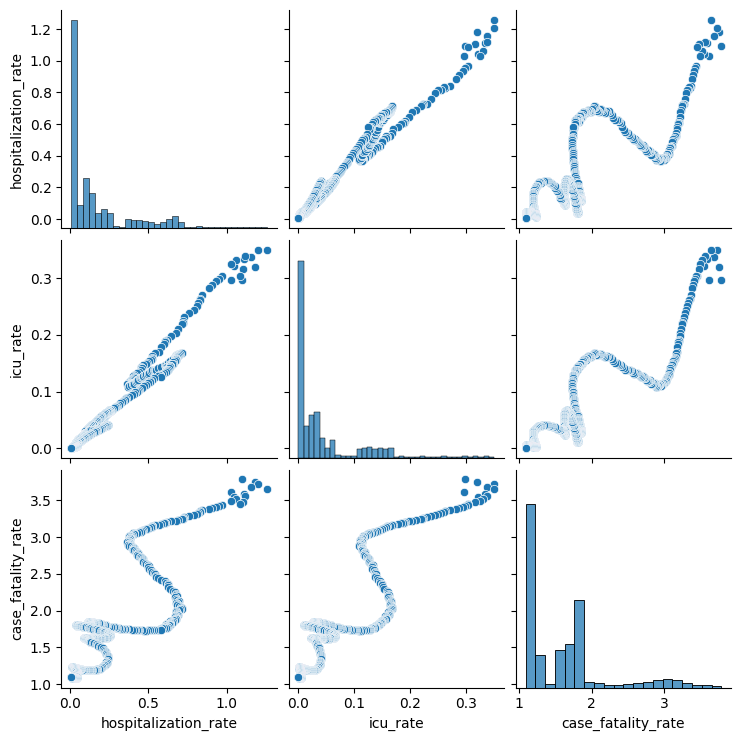

In [7]:
sns.pairplot(df[['hospitalization_rate', 'icu_rate', 'case_fatality_rate']])

## ICU Rate & Case Fatality Rate

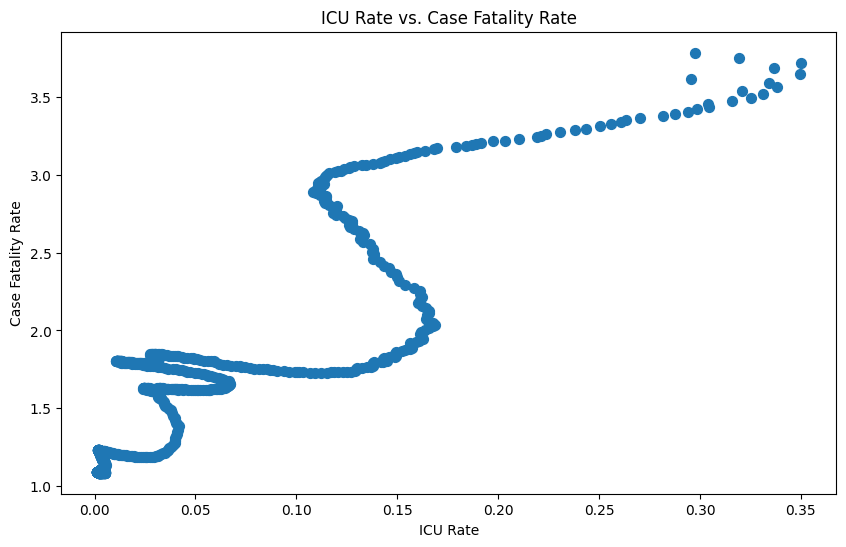

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['icu_rate'], df['case_fatality_rate'], s=50) # s=50 is the size of the dots
plt.xlabel('ICU Rate')
plt.ylabel('Case Fatality Rate')
plt.title('ICU Rate vs. Case Fatality Rate')
plt.show()

In [9]:
# ELBOW METHOD  

#  Features for clustering
X = df[['icu_rate', 'case_fatality_rate']]

optimal_cluster_num = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)

    # Inertia measures how well a dataset was clustered by K-Means
    optimal_cluster_num.append(kmeans.inertia_)

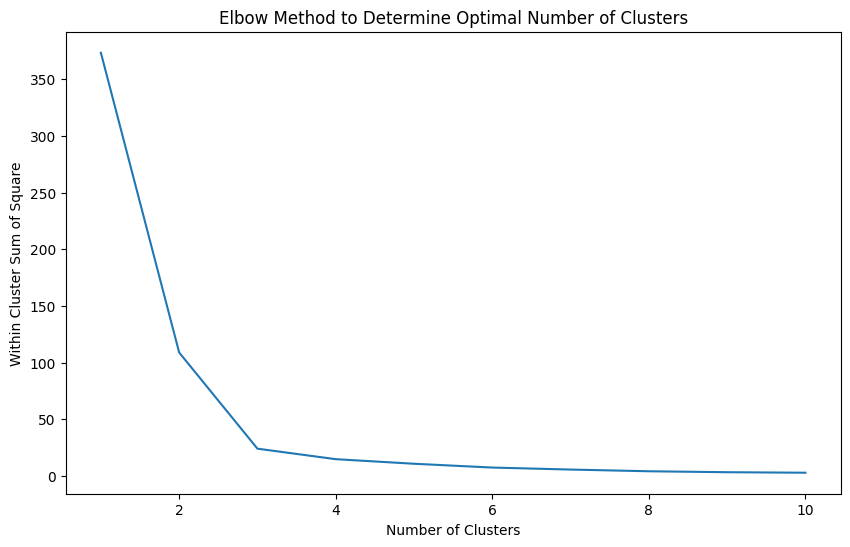

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), optimal_cluster_num)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
df['cluster_icu_fatal'] = y_kmeans
df

,date,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,icu_patients,hosp_patients,weekly_hosp_admissions,hospitalization_rate,icu_rate,case_fatality_rate,hospitalization_need,icu_requirement,hospitalization_need_num,icu_requirement_num,cluster_icu_fatal
0,2020-07-21,3853351.0,60012.0,145801.0,11390.679,430.994,11458.0,42195.0,30552.0,1.095021,0.297352,3.783746,High,High,2,2,1
1,2020-07-22,3911870.0,58519.0,146668.0,11563.663,433.557,12487.0,46107.0,31352.0,1.178643,0.319208,3.749307,High,High,2,2,1
2,2020-07-23,3975206.0,63336.0,147861.0,11750.887,437.084,13916.0,47834.0,31679.0,1.203309,0.350070,3.719581,High,High,2,2,1
3,2020-07-24,4047622.0,72416.0,149052.0,11964.952,440.604,13627.0,46748.0,31870.0,1.154950,0.336667,3.682458,High,High,2,2,1
4,2020-07-25,4120764.0,73142.0,150306.0,12181.163,444.311,14402.0,51831.0,32804.0,1.257801,0.349498,3.647527,High,High,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2023-05-16,103436829.0,0.0,1127152.0,305763.910,3331.912,1052.0,7949.0,8872.0,0.007685,0.001017,1.089701,Low,Low,0,0,0
1030,2023-05-17,103436829.0,0.0,1127152.0,305763.910,3331.912,1079.0,7785.0,8768.0,0.007526,0.001043,1.089701,Low,Low,0,0,0
1031,2023-05-18,103436829.0,0.0,1127152.0,305763.910,3331.912,1030.0,7576.0,8617.0,0.007324,0.000996,1.089701,Low,Low,0,0,0
1032,2023-05-19,103436829.0,0.0,1127152.0,305763.910,3331.912,1015.0,7613.0,8633.0,0.007360,0.000981,1.089701,Low,Low,0,0,0


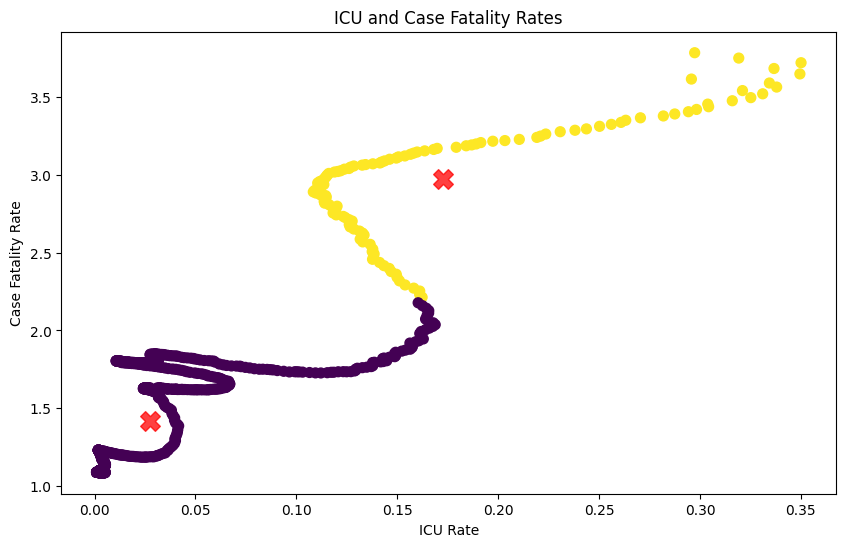

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('ICU Rate')
plt.ylabel('Case Fatality Rate')
plt.title('ICU and Case Fatality Rates')
plt.show()

## ICU Rate & Hospitalization Rate

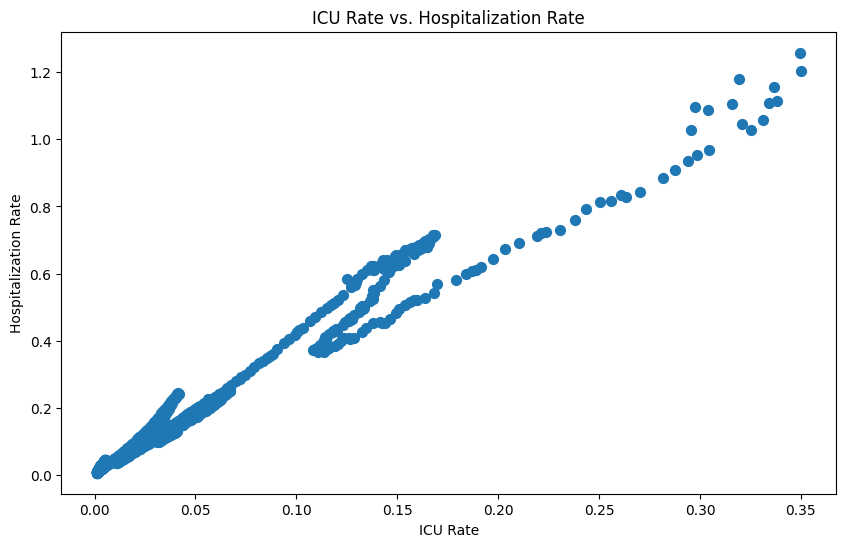

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df['icu_rate'], df['hospitalization_rate'], s=50) # s=50 is the size of the dots
plt.xlabel('ICU Rate')
plt.ylabel('Hospitalization Rate')
plt.title('ICU Rate vs. Hospitalization Rate')
plt.show()

In [14]:
# ELBOW METHOD  

#  Features for clustering
X = df[['icu_rate', 'hospitalization_rate']]

optimal_cluster_num = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)

    # Inertia measures how well a dataset was clustered by K-Means
    optimal_cluster_num.append(kmeans.inertia_)

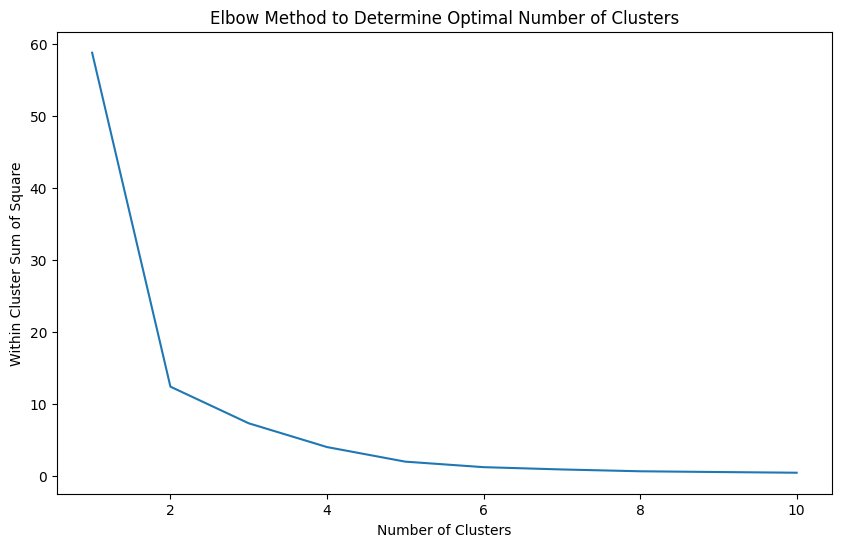

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), optimal_cluster_num)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
df['cluster_icu_hos'] = y_kmeans
df

,date,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,icu_patients,hosp_patients,weekly_hosp_admissions,hospitalization_rate,icu_rate,case_fatality_rate,hospitalization_need,icu_requirement,hospitalization_need_num,icu_requirement_num,cluster_icu_fatal,cluster_icu_hos
0,2020-07-21,3853351.0,60012.0,145801.0,11390.679,430.994,11458.0,42195.0,30552.0,1.095021,0.297352,3.783746,High,High,2,2,1,1
1,2020-07-22,3911870.0,58519.0,146668.0,11563.663,433.557,12487.0,46107.0,31352.0,1.178643,0.319208,3.749307,High,High,2,2,1,1
2,2020-07-23,3975206.0,63336.0,147861.0,11750.887,437.084,13916.0,47834.0,31679.0,1.203309,0.350070,3.719581,High,High,2,2,1,1
3,2020-07-24,4047622.0,72416.0,149052.0,11964.952,440.604,13627.0,46748.0,31870.0,1.154950,0.336667,3.682458,High,High,2,2,1,1
4,2020-07-25,4120764.0,73142.0,150306.0,12181.163,444.311,14402.0,51831.0,32804.0,1.257801,0.349498,3.647527,High,High,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2023-05-16,103436829.0,0.0,1127152.0,305763.910,3331.912,1052.0,7949.0,8872.0,0.007685,0.001017,1.089701,Low,Low,0,0,0,0
1030,2023-05-17,103436829.0,0.0,1127152.0,305763.910,3331.912,1079.0,7785.0,8768.0,0.007526,0.001043,1.089701,Low,Low,0,0,0,0
1031,2023-05-18,103436829.0,0.0,1127152.0,305763.910,3331.912,1030.0,7576.0,8617.0,0.007324,0.000996,1.089701,Low,Low,0,0,0,0
1032,2023-05-19,103436829.0,0.0,1127152.0,305763.910,3331.912,1015.0,7613.0,8633.0,0.007360,0.000981,1.089701,Low,Low,0,0,0,0


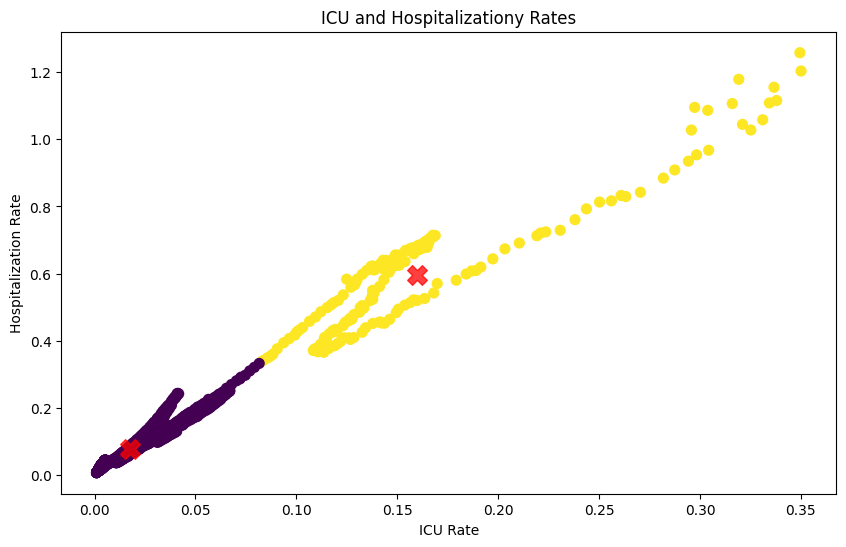

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('ICU Rate')
plt.ylabel('Hospitalization Rate')
plt.title('ICU and Hospitalizationy Rates')
plt.show()

## 3D Graph

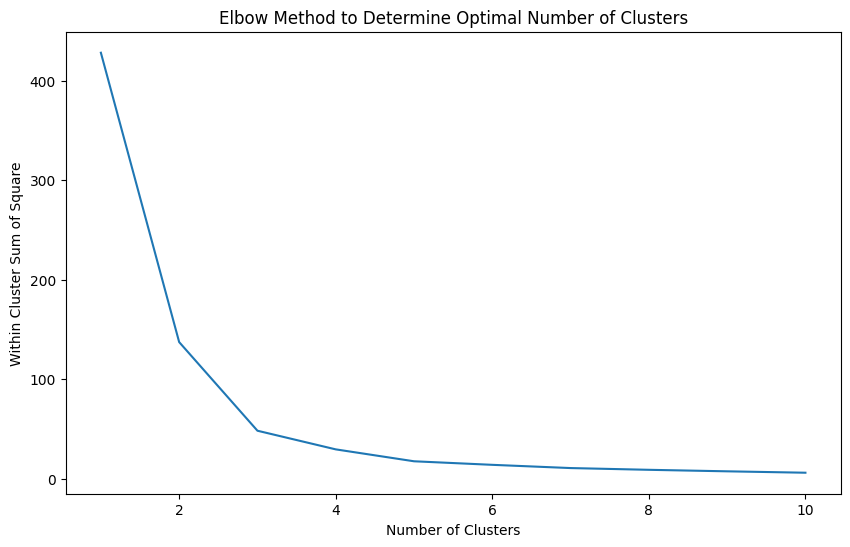

In [18]:
# Features for clustering
X = df[['hospitalization_rate', 'icu_rate', 'case_fatality_rate']]

optimal_cluster_num = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)

    # Inertia measures how well a dataset was clustered by K-Means
    optimal_cluster_num.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), optimal_cluster_num)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

df['cluster_icu_hos_fatal'] = y_kmeans
df

,date,total_cases,new_cases,total_deaths,total_cases_per_million,total_deaths_per_million,icu_patients,hosp_patients,weekly_hosp_admissions,hospitalization_rate,icu_rate,case_fatality_rate,hospitalization_need,icu_requirement,hospitalization_need_num,icu_requirement_num,cluster_icu_fatal,cluster_icu_hos,cluster_icu_hos_fatal
0,2020-07-21,3853351.0,60012.0,145801.0,11390.679,430.994,11458.0,42195.0,30552.0,1.095021,0.297352,3.783746,High,High,2,2,1,1,1
1,2020-07-22,3911870.0,58519.0,146668.0,11563.663,433.557,12487.0,46107.0,31352.0,1.178643,0.319208,3.749307,High,High,2,2,1,1,1
2,2020-07-23,3975206.0,63336.0,147861.0,11750.887,437.084,13916.0,47834.0,31679.0,1.203309,0.350070,3.719581,High,High,2,2,1,1,1
3,2020-07-24,4047622.0,72416.0,149052.0,11964.952,440.604,13627.0,46748.0,31870.0,1.154950,0.336667,3.682458,High,High,2,2,1,1,1
4,2020-07-25,4120764.0,73142.0,150306.0,12181.163,444.311,14402.0,51831.0,32804.0,1.257801,0.349498,3.647527,High,High,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2023-05-16,103436829.0,0.0,1127152.0,305763.910,3331.912,1052.0,7949.0,8872.0,0.007685,0.001017,1.089701,Low,Low,0,0,0,0,0
1030,2023-05-17,103436829.0,0.0,1127152.0,305763.910,3331.912,1079.0,7785.0,8768.0,0.007526,0.001043,1.089701,Low,Low,0,0,0,0,0
1031,2023-05-18,103436829.0,0.0,1127152.0,305763.910,3331.912,1030.0,7576.0,8617.0,0.007324,0.000996,1.089701,Low,Low,0,0,0,0,0
1032,2023-05-19,103436829.0,0.0,1127152.0,305763.910,3331.912,1015.0,7613.0,8633.0,0.007360,0.000981,1.089701,Low,Low,0,0,0,0,0


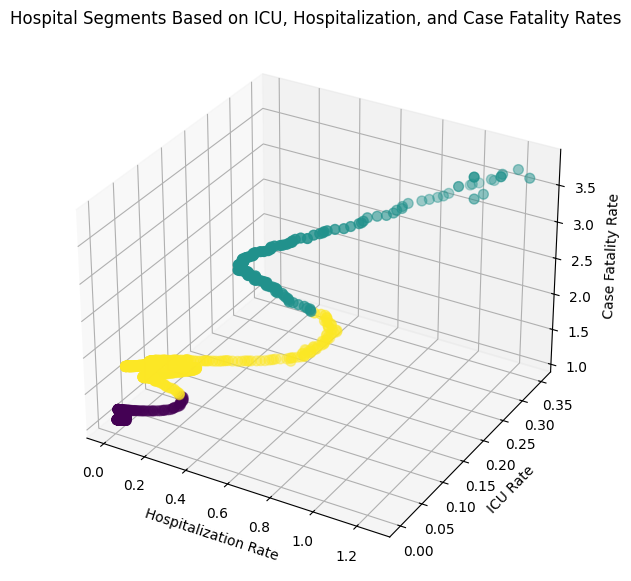

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['hospitalization_rate'], df['icu_rate'], df['case_fatality_rate'], c=df['cluster_icu_hos_fatal'],s=50, cmap='viridis')
ax.set_xlabel('Hospitalization Rate')
ax.set_ylabel('ICU Rate')
ax.set_zlabel('Case Fatality Rate')
plt.title('Hospital Segments Based on ICU, Hospitalization, and Case Fatality Rates')
plt.show()

### Analysis of 3D Clustering Visualization

The provided 3D visualization clusters data points based on three key features: ICU Rate, Hospitalization Rate, and Case Fatality Rate. Below is an interpretation of the results:

#### 1. **Cluster Separation**
- The data points are grouped into distinct clusters (e.g., yellow, teal, and purple in the graph). These clusters likely represent groups with similar characteristics in terms of ICU utilization, hospitalization, and case fatality rates.
- For example:
  - One cluster might represent periods or regions with low ICU and hospitalization rates but higher case fatality rates.
  - Another cluster might show higher ICU and hospitalization rates, potentially corresponding to healthcare system stress during peak times.

#### 2. **Health System Stress**
- The clusters may help identify periods or areas of heightened healthcare system stress, characterized by higher ICU and hospitalization rates.
- Such insights can inform decision-makers about periods of extreme demand and allow for better resource allocation in the future.

#### 3. **Policy Implications**
- Clusters with low hospitalization and case fatality rates could indicate successful healthcare interventions, such as effective vaccination programs, public health policies, or improved healthcare infrastructure.
- Conversely, clusters with higher rates might reflect areas or times where interventions were less effective or insufficient resources were available.

#### 4. **Trend Analysis**
- The gradual shifts between clusters could represent temporal or regional changes in pandemic impact. For instance:
  - Moving from lower to higher rates might indicate a surge in cases.
  - Shifting from higher to lower rates could reflect successful mitigation efforts, such as lockdowns or vaccination rollouts.

### Recommendations for Further Analysis
To gain more actionable insights:
1. **Map Clusters to Time or Region**: Analyze the clusters in the context of specific time periods or geographical locations to understand the underlying factors.
2. **Cluster Centroids**: Investigate the centroids (average values for each cluster) to describe the defining characteristics of each group.
3. **Policy Evaluation**: Compare clusters to known interventions to evaluate their effectiveness and refine future strategies.
4. **Combine with Additional Features**: Incorporate more features, such as vaccination rates or demographic data, to further enrich the analysis.

